# Regression with one hidden layer

**[Faisal Z. Qureshi](http://vclab.science.uoit.ca)**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import pprint as pp

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

## Test data

(-5, 5)

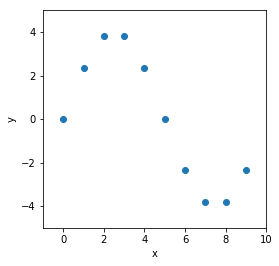

In [2]:
np.random.seed(0)

n_samples = 10
x = np.arange(n_samples)
y = np.sin(2 * np.pi * x / n_samples) * 4

plt.figure(figsize=(4,4))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,10)
plt.ylim(-5,5)

## Torch dataset

We will create a dataset class that will be used by dataloader to present batches during training.

In [3]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([self.x[idx]], dtype=torch.float32), 
            'label': torch.tensor(np.array([self.y[idx]]), dtype=torch.float32)}
        return sample

Testing our dataset.  

In [4]:
import pprint as pp

dataset = MyDataset(x, y)
print('length: ', len(dataset))
for i in range(5):
    pp.pprint(dataset[i])

length:  10
{'feature': tensor([0.]), 'label': tensor([0.])}
{'feature': tensor([1.]), 'label': tensor([2.3511])}
{'feature': tensor([2.]), 'label': tensor([3.8042])}
{'feature': tensor([3.]), 'label': tensor([3.8042])}
{'feature': tensor([4.]), 'label': tensor([2.3511])}


Using dataloader to construct batches for training purposes

In [5]:
dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)
    break # Otherwise it prints too much stuff


batch# = 0
samples: 
{'feature': tensor([[8.],
        [9.],
        [6.],
        [2.]]),
 'label': tensor([[-3.8042],
        [-2.3511],
        [-2.3511],
        [ 3.8042]])}


## Logistic regression model

In [6]:
class Regression(nn.Module):
    def __init__(self, input_size):
        super(Regression, self).__init__()
        
        # input layer
        self.linear1 = nn.Linear(input_size, 10)
        self.tan1 = nn.Tanh()
        
        # hidden layer
        self.linear2 = nn.Linear(10, 10)
        self.tan2 = nn.Tanh()
        
        # output layer -- Sigmoid since we are interested in classification
        self.linear3 = nn.Linear(10, 1)
    
    def forward(self, x):
       # input layer
        out = self.tan1(self.linear1(x))
        
        # hidden layer
        out = self.tan2(self.linear2(out))

        # output layer -- No Sigmoid since we are interested in regression
        out = self.linear3(out)
        
        return out

## Loss

In [7]:
import torch.nn as nn
class MyLoss(nn.Module):
    def __init__(self):
        super(MyLoss, self).__init__()
        
    def forward(self, predictions, targets):
#        print(predictions.shape)
#        print(targets.shape)
        d = torch.sub(predictions, targets)
        d2 = torch.pow(d, 2)
        d2sum = torch.sum(d2)
        
        return d2sum

## Accuracy

Counting how many predictions were correct.

In [8]:
def accuracy(predictions, targets):
    d = torch.sub(predictions, targets)
    d2 = torch.pow(d, 2)
    d2sum = torch.sum(d2)
    return d2sum.item()

## Training

In [9]:
import torch.nn.functional as F

model = Regression(1)
criterion = MyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  

dataset = MyDataset(x, y)
batch_size = 16
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

num_epochs = 5000
for epoch in range(num_epochs):
    n = 0
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = criterion(predictions, samples['label'])
        n += accuracy(predictions, samples['label'])
        optimizer.zero_grad()
        error.backward()        
        optimizer.step()
    if epoch % 200 == 0:
        print('epoch %d:' % epoch, error.item())
        print('accuracy', n)

epoch 0: 82.06343078613281
accuracy 82.06343078613281
epoch 200: 73.38374328613281
accuracy 73.38374328613281
epoch 400: 73.78237915039062
accuracy 73.78237915039062
epoch 600: 73.3929214477539
accuracy 73.3929214477539
epoch 800: 55.42934799194336
accuracy 55.42934799194336
epoch 1000: 9.528599739074707
accuracy 9.528599739074707
epoch 1200: 2.495415449142456
accuracy 2.495415449142456
epoch 1400: 2.1951284408569336
accuracy 2.1951284408569336
epoch 1600: 1.8466354608535767
accuracy 1.8466354608535767
epoch 1800: 1.8523292541503906
accuracy 1.8523292541503906
epoch 2000: 1.7544697523117065
accuracy 1.7544697523117065
epoch 2200: 1.671697974205017
accuracy 1.671697974205017
epoch 2400: 1.6358907222747803
accuracy 1.6358907222747803
epoch 2600: 1.6092758178710938
accuracy 1.6092758178710938
epoch 2800: 1.5901775360107422
accuracy 1.5901775360107422
epoch 3000: 1.5772935152053833
accuracy 1.5772935152053833
epoch 3200: 1.5678184032440186
accuracy 1.5678184032440186
epoch 3400: 1.48448789

## Visualizing results

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
[ 1.1032820e-04  2.3362899e+00  3.6030660e+00  2.9903252e+00
  2.8890362e+00 -1.7187625e-01 -3.1443129e+00 -3.2978761e+00
 -3.2996073e+00 -3.2996252e+00]


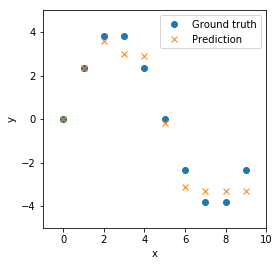

In [11]:
x_try = torch.tensor(x, dtype=torch.float32)
print(x_try.unsqueeze(1))

y_try = model(x_try.unsqueeze(1))
yy_try = y_try.detach().squeeze().numpy()
print(yy_try)

plt.figure(figsize=(4,4))
plt.plot(x, y, 'o', label='Ground truth')
plt.plot(x, yy_try, 'x', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,10)
plt.ylim(-5,5)
plt.legend()